<a href="https://colab.research.google.com/github/from-iqwerty-import-IQ/Deep_Learning_Projects/blob/main/Mask%20Protocal%20Violation%20/mask_violation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'



In [4]:
!kaggle datasets download -d vijaykumar1799/face-mask-detection


 98% 218M/222M [00:01<00:00, 155MB/s]
100% 222M/222M [00:01<00:00, 144MB/s]


In [5]:
%%capture
!unzip \*.zip && rm *.zip &> /dev/null

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from sklearn.preprocessing import LabelBinarizer

In [84]:
training_dir = '/content/Dataset'


In [85]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split = 0.2)
#test_datagen = ImageDataGenerator(rescale=1./255)

In [86]:
train_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    subset='training',
    

)

test_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    subset='validation',
    
)

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [74]:

convo_base = ResNet50(weights='imagenet',
                   include_top=False,
                   input_shape=(224,224,3),
                   classes = 3
                   )

In [87]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

#model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [83]:

model = models.Sequential()

In [76]:
model.add(convo_base)

model.add(layers.Flatten())
#model.add(layers.Dropout(0.3))

#model.add(layers.Dense(512,activation='relu'))
#model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [88]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)    

In [89]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['acc'],
               loss=tf.keras.losses.CategoricalCrossentropy())


In [45]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath="/content/transfer_l_mode.h5",
                                         monitor="val_acc",
                                         mode="max",
                                         save_best_only=True,)

In [91]:
trained_model = model.fit(
    train_genrator,
    validation_data= test_genrator,
    epochs = 15,
    #steps_per_epoch=100,
    #validation_steps=33,
    #callbacks = [check_point]
    )

Epoch 1/15
113/113 [==============================] - 16s 138ms/step - loss: 0.0553 - acc: 0.9819 - val_loss: 0.1581 - val_acc: 0.9487
Epoch 2/15
113/113 [==============================] - 15s 129ms/step - loss: 0.0437 - acc: 0.9846 - val_loss: 0.0967 - val_acc: 0.9721
Epoch 3/15
113/113 [==============================] - 15s 129ms/step - loss: 0.0276 - acc: 0.9900 - val_loss: 0.0827 - val_acc: 0.9744
Epoch 4/15
113/113 [==============================] - 15s 130ms/step - loss: 0.0393 - acc: 0.9871 - val_loss: 0.0977 - val_acc: 0.9721
Epoch 5/15
113/113 [==============================] - 15s 135ms/step - loss: 0.0178 - acc: 0.9936 - val_loss: 0.0610 - val_acc: 0.9827
Epoch 6/15
113/113 [==============================] - 15s 129ms/step - loss: 0.0445 - acc: 0.9854 - val_loss: 0.1088 - val_acc: 0.9699
Epoch 7/15
113/113 [==============================] - 15s 128ms/step - loss: 0.0186 - acc: 0.9940 - val_loss: 0.0707 - val_acc: 0.9749
Epoch 8/15
113/113 [==============================] - 1

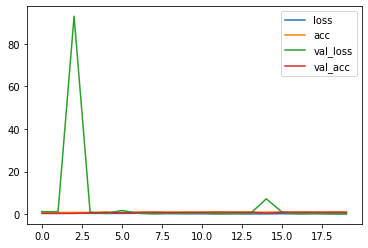

In [47]:
pd.DataFrame(trained_model.history).plot()

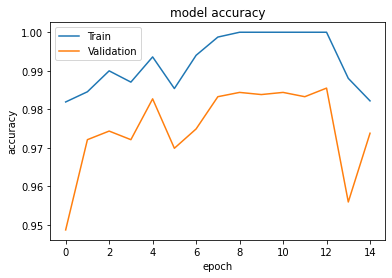

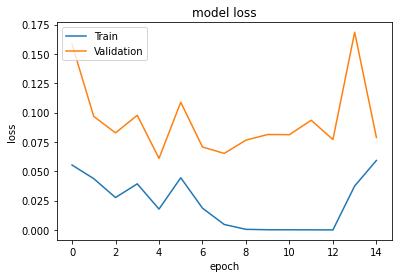

In [93]:
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_genrator)

158/158 [==============================] - 70s 442ms/step - loss: 0.1282 - acc: 0.9561


[0.12824402749538422, 0.956092894077301]

In [ ]:
test_genrator = test_datagen.flow_from_directory(
    validate_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'categorical',
    #subset='validation',
    
)

Found 6592 images belonging to 3 classes.


In [ ]:
model.evaluate(test_genrator)

330/330 [==============================] - 91s 277ms/step - loss: 0.1575 - acc: 0.9372


[0.15748372673988342, 0.9371966123580933]

In [ ]:
model.save("/content/mask_detection_969.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
!wget 'https://www.click2houston.com/resizer/ef42100034hKbFFiXWoLiBAx9Jw=/800x450/smart/filters:format(jpeg):strip_exif(true):strip_icc(true):no_upscale(true):quality(65)/d1vhqlrjc8h82r.cloudfront.net/06-20-2019/t_cb2957c3e55642f8be67ade5e3c9aed7_name_djJ8MjAzMTA4MXxJxEQrqbuOeS3WeV_i8170YyrdllSz_YNc_8bKrwT3wWyoSckW92b_iw_uRePVpRchAqN3ccavPBdpFgQI2YdCXo10ctPUUZHGN6WYTCtXJYu8H5Jyx5ABuagWjzYpH19VeDeAHa_NpIRAHSbZuEGoKw8MTqHVFxMxZrsw31ztp2Pyh1dAZQm806HN3wwYuAiRVireIXvasRVHi03NUUPH'

The name is too long, 268 chars total.
Trying to shorten...
New name is t_cb2957c3e55642f8be67ade5e3c9aed7_name_djJ8MjAzMTA4MXxJxEQrqbuOeS3WeV_i8170YyrdllSz_YNc_8bKrwT3wWyoSckW92b_iw_uRePVpRchAqN3ccavPBdpFgQI2YdCXo10ctPUUZHGN6WYTCtXJYu8H5Jyx5ABuagWjzYpH19VeDeAHa_NpIRAHSbZuEGoKw8MTqHVFxMxZrsw31ztp2Pyh1dAZQm8.
--2021-12-27 15:25:00--  https://www.click2houston.com/resizer/ef42100034hKbFFiXWoLiBAx9Jw=/800x450/smart/filters:format(jpeg):strip_exif(true):strip_icc(true):no_upscale(true):quality(65)/d1vhqlrjc8h82r.cloudfront.net/06-20-2019/t_cb2957c3e55642f8be67ade5e3c9aed7_name_djJ8MjAzMTA4MXxJxEQrqbuOeS3WeV_i8170YyrdllSz_YNc_8bKrwT3wWyoSckW92b_iw_uRePVpRchAqN3ccavPBdpFgQI2YdCXo10ctPUUZHGN6WYTCtXJYu8H5Jyx5ABuagWjzYpH19VeDeAHa_NpIRAHSbZuEGoKw8MTqHVFxMxZrsw31ztp2Pyh1dAZQm806HN3wwYuAiRVireIXvasRVHi03NUUPH
Resolving www.click2houston.com (www.click2houston.com)... 23.53.122.208, 23.53.122.219, 2600:1405:800::6864:a831, ...
Connecting to www.click2houston.com (www.click2houston.com)|23.53.122.20

In [ ]:
img = '/content/t_cb2957c3e55642f8be67ade5e3c9aed7_name_djJ8MjAzMTA4MXxJxEQrqbuOeS3WeV_i8170YyrdllSz_YNc_8bKrwT3wWyoSckW92b_iw_uRePVpRchAqN3ccavPBdpFgQI2YdCXo10ctPUUZHGN6WYTCtXJYu8H5Jyx5ABuagWjzYpH19VeDeAHa_NpIRAHSbZuEGoKw8MTqHVFxMxZrsw31ztp2Pyh1dAZQm8'

In [ ]:
from keras.preprocessing import image

[[0. 1. 0.]]


'proper mask'

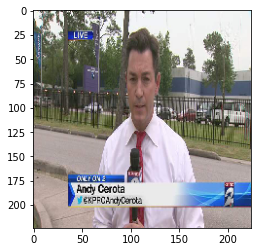

In [ ]:
img = image.load_img(img, target_size=(224, 224,3))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
pre = model.predict(img)
print(pre)
class_name = ['impropermask','proper mask','no_mask']
class_name[np.argmax(pre)]